In [41]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [42]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [43]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [44]:
# Merge the two data frames into a single data frame
merged_data = pd.merge(mouse_metadata, study_results,on="Mouse ID")
merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [45]:
#Check for mice with duplicate timepoint values
mouse_check = merged_data.copy()
mouse_check = mouse_check.groupby('Mouse ID')['Timepoint'].value_counts().max()
mouse_check
#since this returns 2, there is at least one mouse with two entries for a single timepoint

2

In [46]:
#checking number of mice
len(merged_data["Mouse ID"].unique())

249

In [47]:
mouse = merged_data.loc[merged_data.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"]
mouse

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [48]:
#remove data for any mouse with duplicate timepoints
cleaned_mice = merged_data.copy()

cleaned_mice = cleaned_mice[cleaned_mice["Mouse ID"].isin(mouse)==False]

cleaned_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [49]:
#confirming that duplicate entries were dropped
len(cleaned_mice["Mouse ID"].unique())

248

In [50]:
#find the mean of tumor volume for each drug regimen
regimen_mean = cleaned_mice.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
regimen_mean


Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [51]:
#find the median of the tumor volume for each drug regimen
regimen_median = cleaned_mice.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
regimen_median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [52]:
#find the variance of the tumor volume for each drug regimen
regimen_variance = cleaned_mice.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
regimen_variance


Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [53]:
#find the standard deviation for the tumor volume of each drug regimen

regimen_std = cleaned_mice.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
regimen_std

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [54]:
#find the SEM of tumor volume for each drug regimen
regimen_sem = cleaned_mice.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
regimen_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [55]:
#create a new data frame to summarize the data

summary_df = pd.DataFrame({"Mean" : regimen_mean, "Median" : regimen_median, "Variance" : regimen_variance, "Standard Deviation" : regimen_std, "SEM" : regimen_sem})

summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [56]:
#create a working copy of the cleaned dataframe
timepoints_df = cleaned_mice.copy()

#find the number of timepoints for each drug regimen by using .value_counts() on the Drug Regimen column

timepoints_counts = timepoints_df.value_counts("Drug Regimen")

timepoints_counts

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
dtype: int64

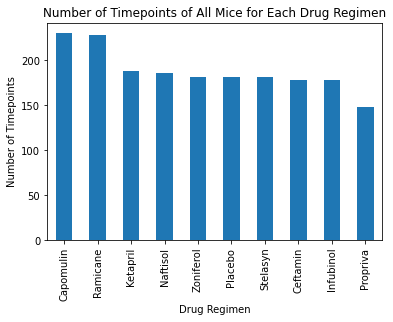

In [57]:
#create a bar graph of all timepoints for mice in each drug regimen using Pandas dataframe.plot() 
timepoints_counts.plot(kind="bar")
plt.ylabel("Number of Timepoints")
plt.title("Number of Timepoints of All Mice for Each Drug Regimen")
plt.show()

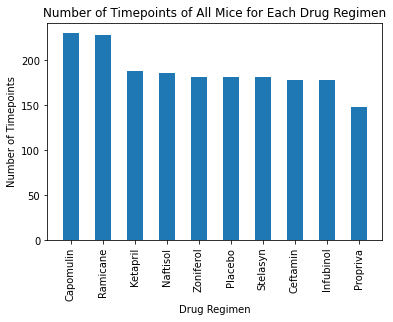

In [58]:
#create a bar graph of all timepoints for mice in each drug regimen using Matplotlib pyplot
x_axis = ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Placebo", "Stelasyn", "Ceftamin", "Infubinol", "Propriva"]
width = [0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5]
plt.bar(x_axis, timepoints_counts, align="center", width=width)
plt.ylabel("Number of Timepoints")
plt.xlabel("Drug Regimen")
plt.title("Number of Timepoints of All Mice for Each Drug Regimen")
plt.xticks(rotation = 90)

plt.show()


In [59]:
#create a copy of the cleaned data frame

gender_df = cleaned_mice.copy()

#find the number of mice of each sex using groupby and .nunique()

gender_grouped = gender_df.groupby("Sex")

sex_ratio = gender_grouped.nunique("Mouse ID")




sex_ratio.rename(columns={"Mouse ID" : "Sex of Mice"}, inplace=True)




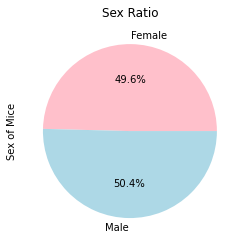

In [60]:
# create a pie chart of the gender distribution using Pandas DataFrame.plot() 
colors = ["pink", "lightblue"]
sex_ratio["Sex of Mice"].plot(kind="pie", colors=colors, autopct='%1.1f%%')
plt.title("Sex Ratio")
plt.show()

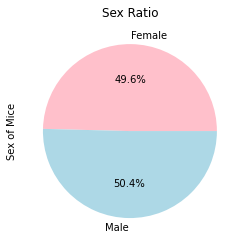

In [61]:
# create a pie chart of the gender distribution using Matplotlib pyplot

labels = ["Female", "Male"]

plt.pie(sex_ratio['Sex of Mice'], labels=labels, colors=colors, autopct='%1.1f%%')
plt.title("Sex Ratio")
plt.ylabel("Sex of Mice")
plt.show()

In [62]:
#create a copy Data Frame to work with

tumor_copy = cleaned_mice.copy()

#create a new data frame that shows only the mice in the four most promising drug regimens

tumor_df = tumor_copy.loc[(tumor_copy["Drug Regimen"].isin(["Capomulin","Ramicane","Infubinol","Ceftamin"]))]




In [63]:
#separate the data for the four drugs

capomulin_tumors = tumor_df.loc[(tumor_df["Drug Regimen"]=="Capomulin")]

ramicane_tumors = tumor_df.loc[(tumor_df["Drug Regimen"]=="Ramicane")]

infubinol_tumors = tumor_df.loc[(tumor_df["Drug Regimen"]=="Infubinol")]

ceftamin_tumors = tumor_df.loc[(tumor_df["Drug Regimen"]=="Ceftamin")]


In [64]:
# clean the data so it can be used for calculations below

cap_final = capomulin_tumors.groupby("Mouse ID").max()["Timepoint"]
cap_volume = pd.DataFrame(cap_final)
cap_merge = pd.merge(cap_volume, cleaned_mice, on=("Mouse ID","Timepoint"), how="left")
cap_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [84]:
# find the quartiles and interquartile range

cap_tumors = cap_merge["Tumor Volume (mm3)"]
cap_quartiles = cap_tumors.quantile([.25,.5,.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq-cap_lowerq
print(f"The lower quartile for Capomulin is: {cap_lowerq}")
print(f"The upper quartile for Capomulin is: {cap_upperq}")
print(f"The interquartile range for Capomulin is: {cap_iqr}")
print(f"The median for Capomulin is: {cap_quartiles[0.5]} ")

# Determine if there are any outliers using upper and lower bounds

cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)
print(f"Values below {cap_lower_bound} could be outliers.")
print(f"Values above {cap_upper_bound} could be outliers.")

#identify any outliers

cap_outliers = cap_tumors.loc[(cap_tumors < cap_lower_bound)|(cap_tumors > cap_upper_bound)]
print(f"Capomulin's potential outliers: {cap_outliers}")

The lower quartile for Capomulin is: 32.37735684
The upper quartile for Capomulin is: 40.1592203
The interquartile range for Capomulin is: 7.781863460000004
The median for Capomulin is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [66]:
# clean the data so it can be used for calculations below

ram_final = ramicane_tumors.groupby("Mouse ID").max()["Timepoint"]
ram_volume = pd.DataFrame(ram_final)
ram_merge = pd.merge(ram_volume, cleaned_mice, on=("Mouse ID","Timepoint"), how="left")
ram_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [85]:
# find the quartiles and interquartile range

ram_tumors = ram_merge["Tumor Volume (mm3)"]
ram_quartiles = ram_tumors.quantile([.25,.5,.75])
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq-ram_lowerq
print(f"The lower quartile for Ramicane is: {ram_lowerq}")
print(f"The upper quartile for Ramicane is: {ram_upperq}")
print(f"The interquartile range for Ramicane is: {ram_iqr}")
print(f"The median for Ramicane is: {ram_quartiles[0.5]} ")

# Determine if there are any outliers using upper and lower bounds

ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)
print(f"Values below {ram_lower_bound} could be outliers.")
print(f"Values above {ram_upper_bound} could be outliers.")

ram_outliers = ram_tumors.loc[(ram_tumors < ram_lower_bound)|(ram_tumors > ram_upper_bound)]
print(f"Ramicane's potential outliers: {ram_outliers}")

The lower quartile for Ramicane is: 31.56046955
The upper quartile for Ramicane is: 40.65900627
The interquartile range for Ramicane is: 9.098536719999998
The median for Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [68]:
# clean the data so it can be used for calculations below

inf_final = infubinol_tumors.groupby("Mouse ID").max()["Timepoint"]
inf_volume = pd.DataFrame(inf_final)
inf_merge = pd.merge(inf_volume, cleaned_mice, on=("Mouse ID","Timepoint"), how="left")
inf_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [86]:
# find the quartiles and interquartile range

inf_tumors = inf_merge["Tumor Volume (mm3)"]
inf_quartiles = inf_tumors.quantile([.25,.5,.75])
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq-inf_lowerq
print(f"The lower quartile for Infubinol is: {inf_lowerq}")
print(f"The upper quartile for Infubinol is: {inf_upperq}")
print(f"The interquartile range for Infubinol is: {inf_iqr}")
print(f"The median for Infubinol is: {inf_quartiles[0.5]} ")

# Determine if there are any outliers using upper and lower bounds

inf_lower_bound = inf_lowerq - (1.5*inf_iqr)
inf_upper_bound = inf_upperq + (1.5*inf_iqr)
print(f"Values below {inf_lower_bound} could be outliers.")
print(f"Values above {inf_upper_bound} could be outliers.")

inf_outliers = inf_tumors.loc[(inf_tumors < inf_lower_bound)|(inf_tumors > inf_upper_bound)]
print(f"Capomulin's potential outliers: {inf_outliers}")

The lower quartile for Infubinol is: 54.04860769
The upper quartile for Infubinol is: 65.52574285
The interquartile range for Infubinol is: 11.477135160000003
The median for Infubinol is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
Capomulin's potential outliers: 5    36.321346
Name: Tumor Volume (mm3), dtype: float64


In [70]:
# clean the data so it can be used for calculations below

cef_final = ceftamin_tumors.groupby("Mouse ID").max()["Timepoint"]
cef_volume = pd.DataFrame(cef_final)
cef_merge = pd.merge(cef_volume, cleaned_mice, on=("Mouse ID","Timepoint"), how="left")
cef_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [87]:
# find the quartiles and interquartile range

cef_tumors = cef_merge["Tumor Volume (mm3)"]
cef_quartiles = cef_tumors.quantile([.25,.5,.75])
cef_lowerq = cef_quartiles[0.25]
cef_upperq = cef_quartiles[0.75]
cef_iqr = cef_upperq-cef_lowerq
print(f"The lower quartile for Ceftamin is: {cef_lowerq}")
print(f"The upper quartile for Ceftamin is: {cef_upperq}")
print(f"The interquartile range for Ceftamin is: {cef_iqr}")
print(f"The median for Ceftamin is: {cef_quartiles[0.5]} ")

# Determine if there are any outliers using upper and lower bounds

cef_lower_bound = cef_lowerq - (1.5*cef_iqr)
cef_upper_bound = cef_upperq + (1.5*cef_iqr)
print(f"Values below {cef_lower_bound} could be outliers.")
print(f"Values above {cef_upper_bound} could be outliers.")

cef_outliers = cef_tumors.loc[(cef_tumors < cef_lower_bound)|(cef_tumors > cef_upper_bound)]
print(f"Capomulin's potential outliers: {cef_outliers}")

The lower quartile for Ceftamin is: 48.72207785
The upper quartile for Ceftamin is: 64.29983003
The interquartile range for Ceftamin is: 15.577752179999997
The median for Ceftamin is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.
Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


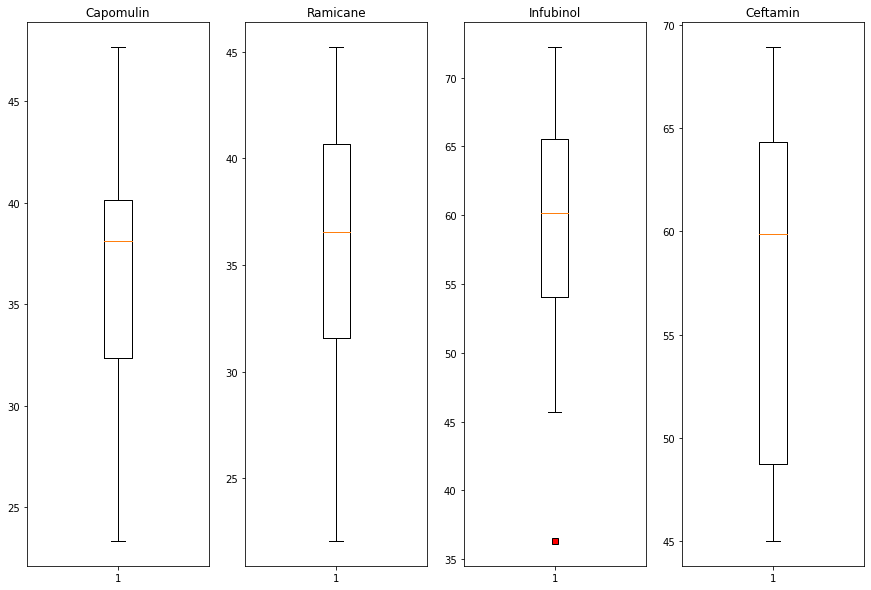

In [72]:
#visualize the data to show any outliers using four individual boxplots within the same figure
fig1, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(15,10))

marker = dict(markerfacecolor='r', marker='s')
ax1.boxplot(cap_tumors, flierprops=marker)
ax2.boxplot(ram_tumors, flierprops=marker)
ax3.boxplot(inf_tumors, flierprops=marker)
ax4.boxplot(cef_tumors, flierprops=marker)

ax1.set_title("Capomulin")
ax2.set_title("Ramicane")
ax3.set_title("Infubinol")
ax4.set_title("Ceftamin")



plt.show()

# NOTE: This was done based on the instructions in the READ ME file and NOT the Starter File


In [73]:
#create a copy Data Frame to work with

cap_copy = cleaned_mice.copy()

#create a new data frame with only mice treated with Capomulin

capomulin_df = cap_copy.loc[(tumor_copy["Drug Regimen"].isin(["Capomulin"]))]

capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [74]:
# collect data for a single capomulin mouse

b128 = capomulin_df.loc[(capomulin_df["Mouse ID"].isin(["b128"]))]

b128

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
300,b128,Capomulin,Female,9,22,0,45.000000,0
301,b128,Capomulin,Female,9,22,5,45.651331,0
302,b128,Capomulin,Female,9,22,10,43.270852,0
303,b128,Capomulin,Female,9,22,15,43.784893,0
304,b128,Capomulin,Female,9,22,20,42.731552,0
305,b128,Capomulin,Female,9,22,25,43.262145,1
306,b128,Capomulin,Female,9,22,30,40.605335,1
307,b128,Capomulin,Female,9,22,35,37.967644,1
308,b128,Capomulin,Female,9,22,40,38.379726,2
309,b128,Capomulin,Female,9,22,45,38.982878,2


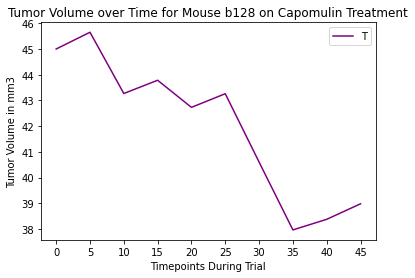

In [75]:
#create a line plot showing tumor volume over time for mouse b128

x_axis = b128["Timepoint"]

y_axis = b128["Tumor Volume (mm3)"]

tick_locs = [value for value in x_axis]

plt.plot(x_axis, y_axis, color="purple")

plt.title("Tumor Volume over Time for Mouse b128 on Capomulin Treatment")
plt.xlabel("Timepoints During Trial")
plt.ylabel("Tumor Volume in mm3")
plt.xticks(tick_locs,x_axis)
plt.legend("Tumor Volume", loc="best")
plt.show()


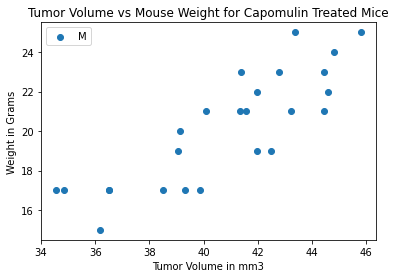

In [80]:
# find averages

ave_tumor = capomulin_df.groupby("Mouse ID").mean()["Tumor Volume (mm3)"]

ave_weight = capomulin_df.groupby("Mouse ID").mean()["Weight (g)"]

#create a scatter plot of tumor volume vs mouse weight for Capomulin treated mice

plt.scatter(ave_tumor ,ave_weight)
plt.xlabel("Tumor Volume in mm3")
plt.ylabel("Weight in Grams")
plt.title("Tumor Volume vs Mouse Weight for Capomulin Treated Mice")
plt.legend("Mice")
plt.show()

In [77]:
#calculate the Pearson correlation coefficient for Capomulin tumor volume and mouse weight using scipy

pearson = st.stats.pearsonr(capomulin_df["Tumor Volume (mm3)"],capomulin_df["Weight (g)"])
print(f"For tumor volume vs mouse weight in Capomulin treated mice, the Pearson r value is {pearson[0]} and the Pearson p value is {pearson[1]}")


For tumor volume vs mouse weight in Capomulin treated mice, the Pearson r value is 0.525699555207717 and the Pearson p value is 9.605446629502006e-18


In [78]:
#calculate the correlation coefficient and linear regression for Capomulin tumor volume and mouse weight using scipy

(slope, intercept, rvalue, pvalue, stderr) = linregress(capomulin_df["Tumor Volume (mm3)"],capomulin_df["Weight (g)"])

regress_values = (capomulin_df["Tumor Volume (mm3)"] * slope + intercept)

regress_values

10      21.208811
11      20.886283
12      19.084978
13      19.246683
14      18.869843
          ...    
440     21.981255
1452    21.208811
1453    21.380518
1454    21.513539
1455    21.651464
Name: Tumor Volume (mm3), Length: 230, dtype: float64

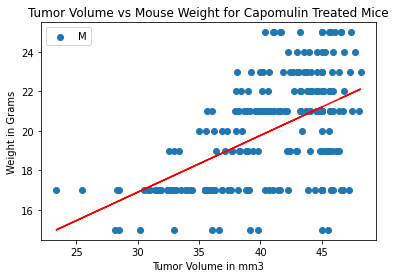

In [79]:
#plot the linear regression on the previous scatter plot

plt.scatter(capomulin_df["Tumor Volume (mm3)"],capomulin_df["Weight (g)"])
plt.xlabel("Tumor Volume in mm3")
plt.ylabel("Weight in Grams")
plt.title("Tumor Volume vs Mouse Weight for Capomulin Treated Mice")
plt.legend("Mice")
plt.plot(capomulin_df["Tumor Volume (mm3)"], regress_values, "r-")
plt.show()